In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, PowerTransformer

# Cargar datos
df = pd.read_csv('data/countries.csv', sep=';')

In [2]:
# Preparar features numéricas
df['num_neighbours'] = df['neighbours'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)
df['phone_code'] = df['phone'].str.extract(r'(\d+)').fillna(0).astype(int)

features = ['area', 'population', 'phone_code', 'num_neighbours']
X = df[features].fillna(0)

In [3]:
# Función para graficar distribución antes y después
def plot_comparison(original, transformed, feature_name):
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(original, bins=30, ax=axes[0], kde=True)
    axes[0].set_title(f'{feature_name} Original')
    sns.histplot(transformed, bins=30, ax=axes[1], kde=True, color='orange')
    axes[1].set_title(f'{feature_name} Transformado')
    plt.show()


1. Escalamiento Min-Max

El escalamiento Min-Max transforma las variables numéricas para que sus valores queden dentro del rango [0, 1]. Esto es útil cuando queremos normalizar la escala de diferentes características para que tengan igual peso, sin alterar la forma de la distribución. Aplicamos Min-Max a las variables area, population, phone_code y num_neighbours de nuestro dataset de países para facilitar el entrenamiento de modelos sensibles a la escala.

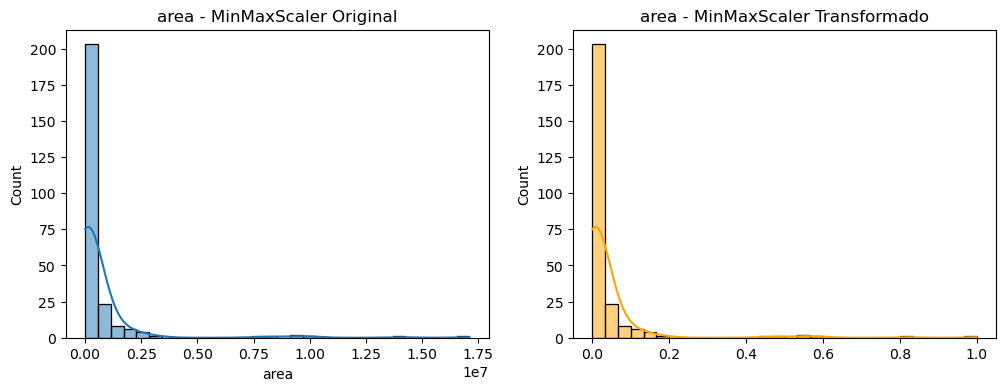

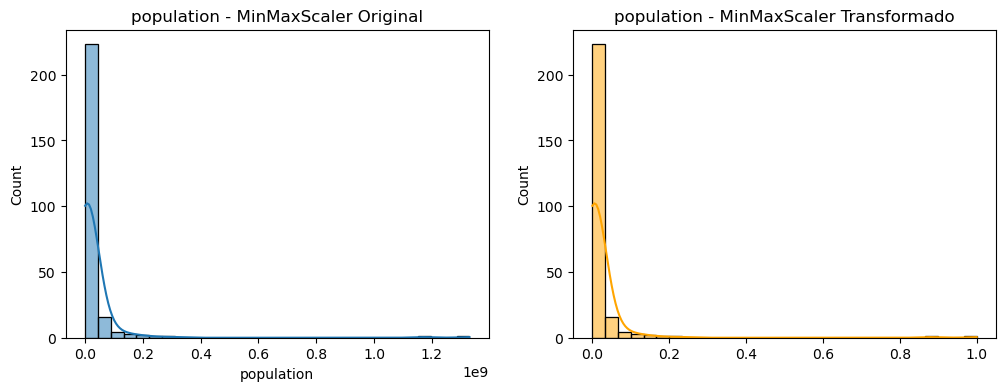

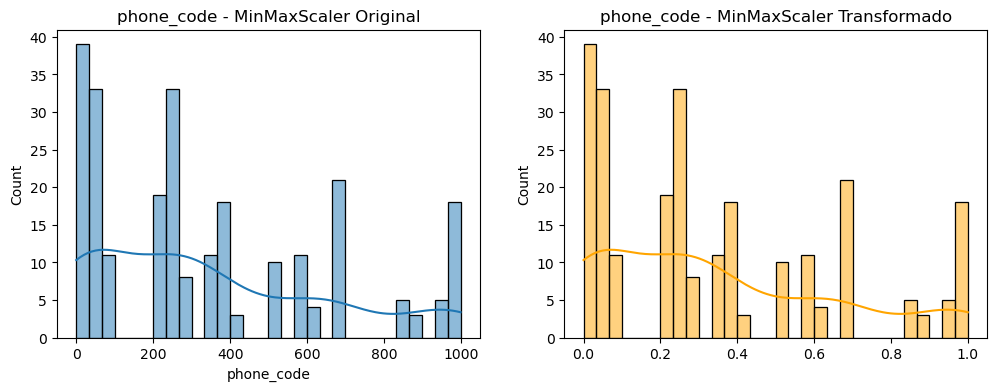

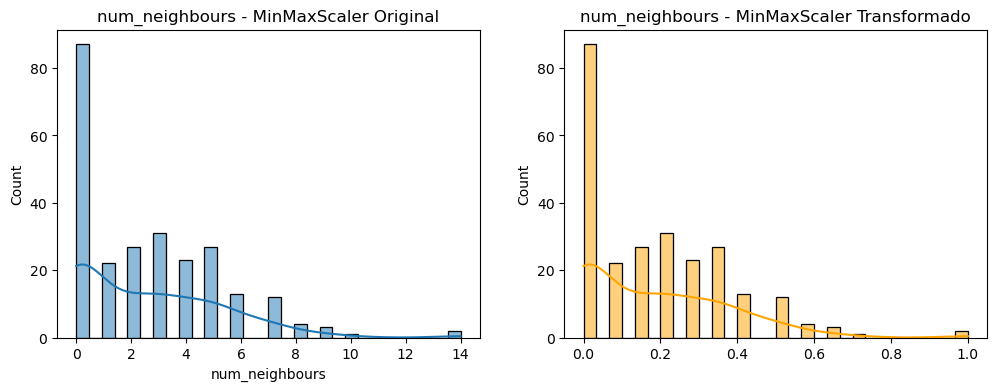

In [4]:
# 1. Escalamiento Min-Max
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

for i, col in enumerate(features):
    plot_comparison(X[col], X_scaled[:, i], f'{col} - MinMaxScaler')

2. Estandarización (StandardScaler)

La estandarización transforma los datos para que tengan media 0 y desviación estándar 1. Esto centra las variables y las escala de manera que sean comparables entre sí, lo que mejora el rendimiento de muchos algoritmos de machine learning. En nuestro dataset, estandarizamos area, population, phone_code y num_neighbours para homogenizar sus rangos y hacerlos comparables.

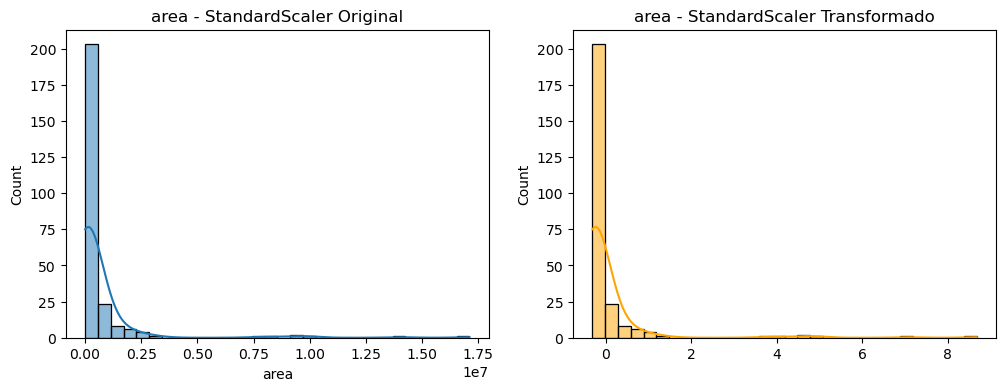

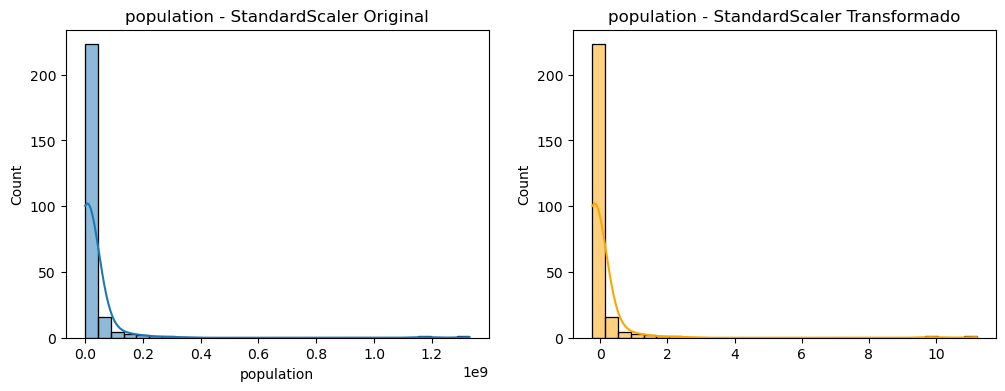

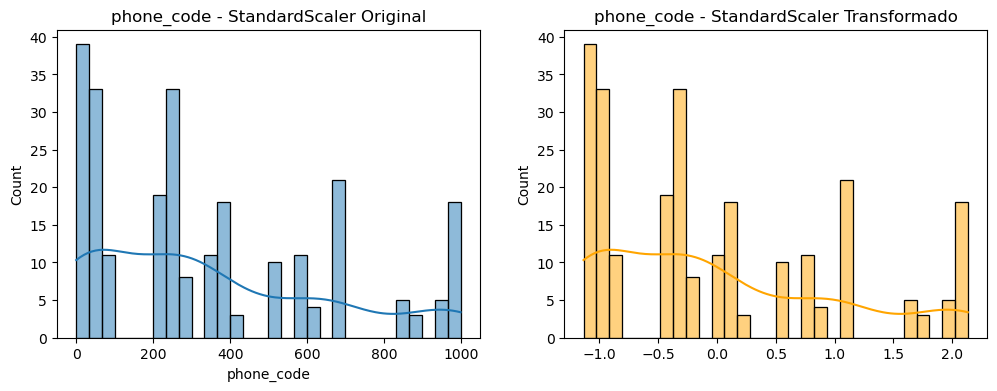

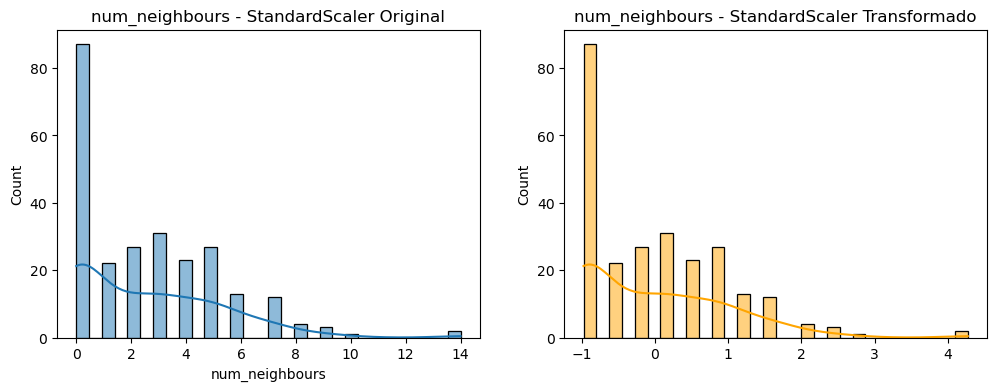

In [5]:
# 2. Estandarización
standardizer = StandardScaler()
X_standardized = standardizer.fit_transform(X)

for i, col in enumerate(features):
    plot_comparison(X[col], X_standardized[:, i], f'{col} - StandardScaler')

3. Normalización (Normalizer)

La normalización escala las filas del dataset para que la norma L2 (longitud del vector) sea igual a 1. Esto se aplica para que cada muestra tenga la misma magnitud, muy útil cuando el interés está en la dirección del vector de características más que en su magnitud absoluta. En nuestro caso, normalizamos cada país (fila) para analizar cómo cambian sus características relativas.

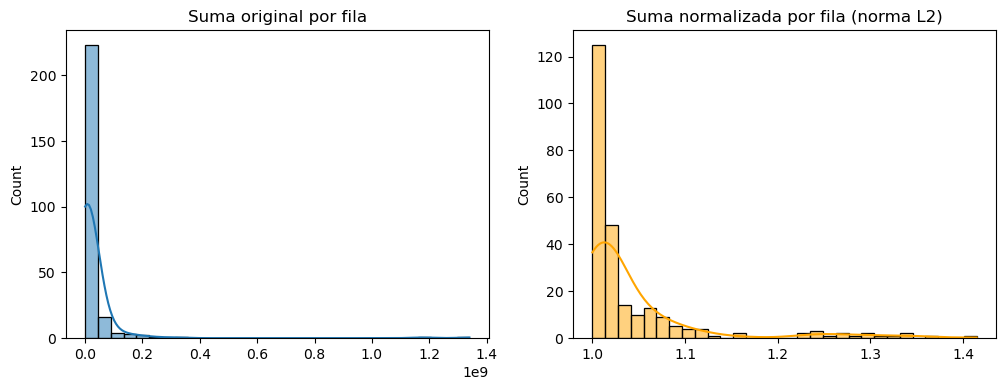

In [6]:
# 3. Normalización (norma L2 por fila)
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

# Normalización es por fila, no por característica. Graficamos suma filas y primeras columnas
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(X.sum(axis=1), bins=30, kde=True)
plt.title('Suma original por fila')
plt.subplot(1,2,2)
sns.histplot(X_normalized.sum(axis=1), bins=30, kde=True, color='orange')
plt.title('Suma normalizada por fila (norma L2)')
plt.show()

4. Binarización

La binarización convierte las variables numéricas en valores binarios según un umbral. Los valores por encima del umbral se convierten en 1 y los demás en 0. Aplicamos la binarización con umbral 0 para identificar la presencia (1) o ausencia (0) de características positivas en area, population, phone_code y num_neighbours.

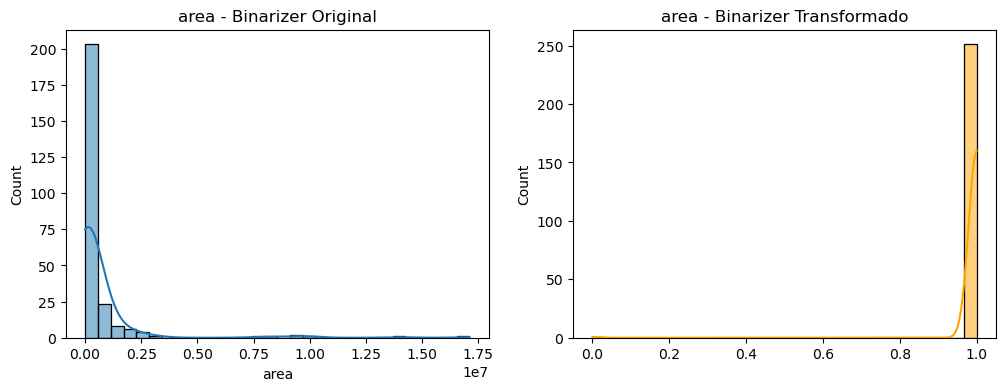

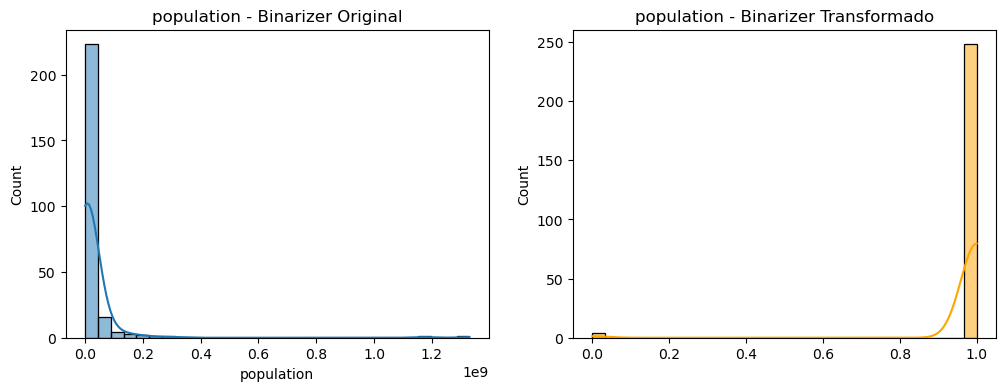

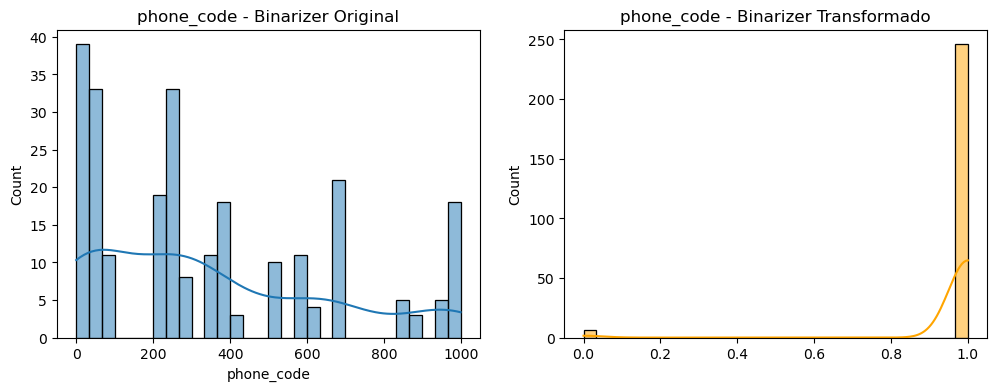

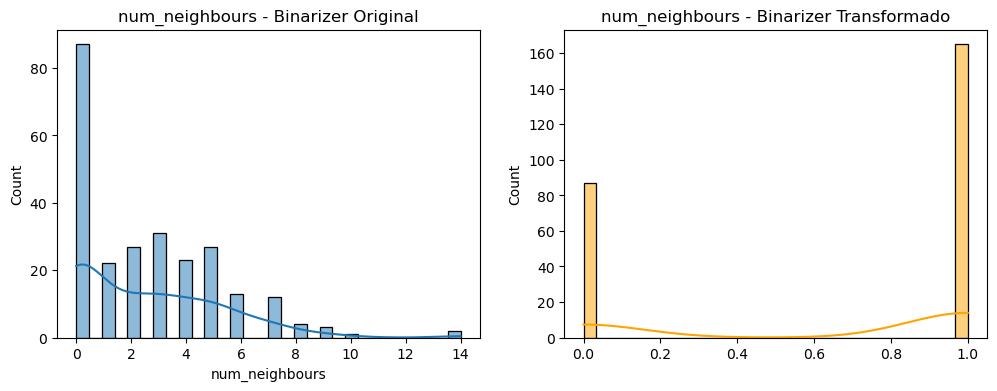

In [7]:

# 4. Binarización (umbral=0)
binarizer = Binarizer(threshold=0)
X_binarized = binarizer.fit_transform(X)

for i, col in enumerate(features):
    plot_comparison(X[col], X_binarized[:, i], f'{col} - Binarizer')

5. Transformación Box-Cox

La transformación Box-Cox es una técnica para estabilizar la varianza y hacer que los datos sean más parecidos a una distribución normal, pero solo funciona con valores positivos. En nuestro dataset, añadimos un pequeño valor para asegurar que todos los datos sean positivos y aplicamos Box-Cox a las variables numéricas para mejorar la normalidad de sus distribuciones.

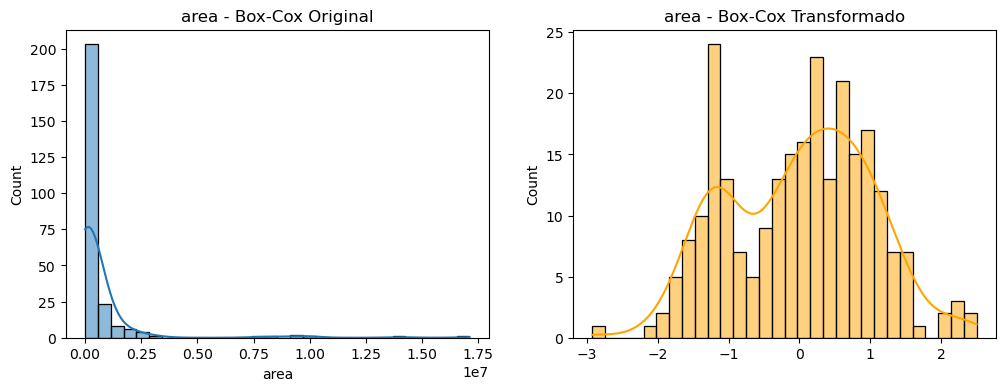

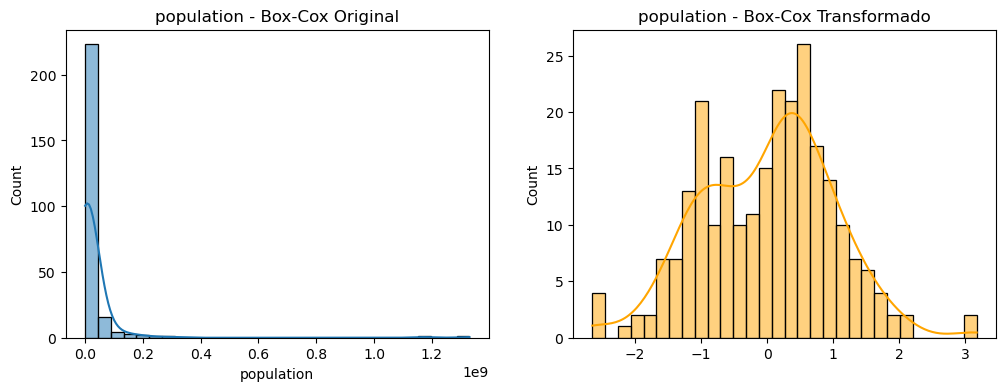

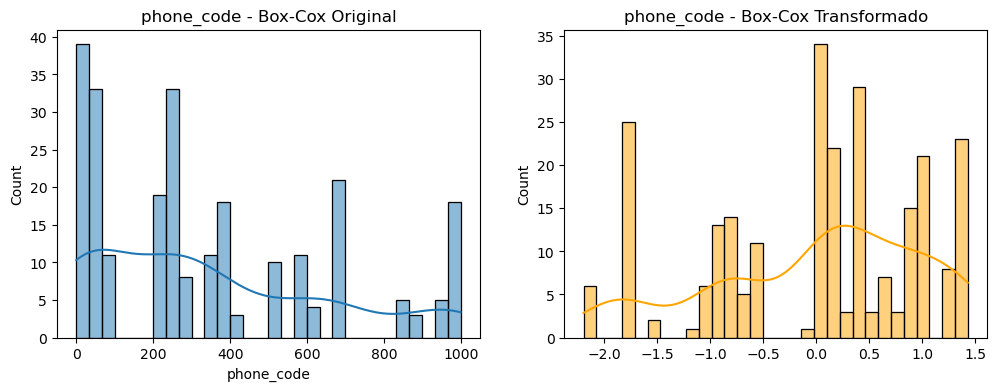

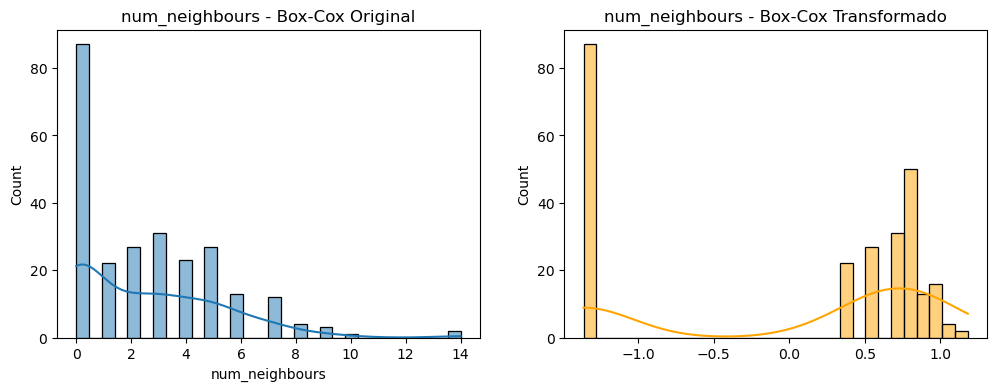

In [8]:
# 5. PowerTransformer Box-Cox (valores positivos)
pt_boxcox = PowerTransformer(method='box-cox')
X_pos = X + 1e-6
X_boxcox = pt_boxcox.fit_transform(X_pos)

for i, col in enumerate(features):
    plot_comparison(X[col], X_boxcox[:, i], f'{col} - Box-Cox')

6. Transformación Yeo-Johnson

La transformación Yeo-Johnson es una extensión de Box-Cox que permite transformar datos que contienen ceros o valores negativos, estabilizando la varianza y acercando la distribución a la normalidad. La aplicamos a las variables numéricas de nuestro dataset para mejorar las propiedades estadísticas de los datos sin necesidad de ajustarlos a solo valores positivos.

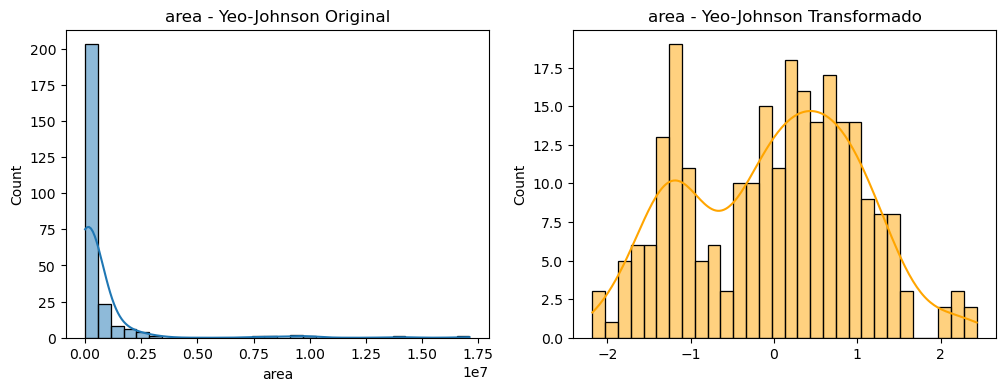

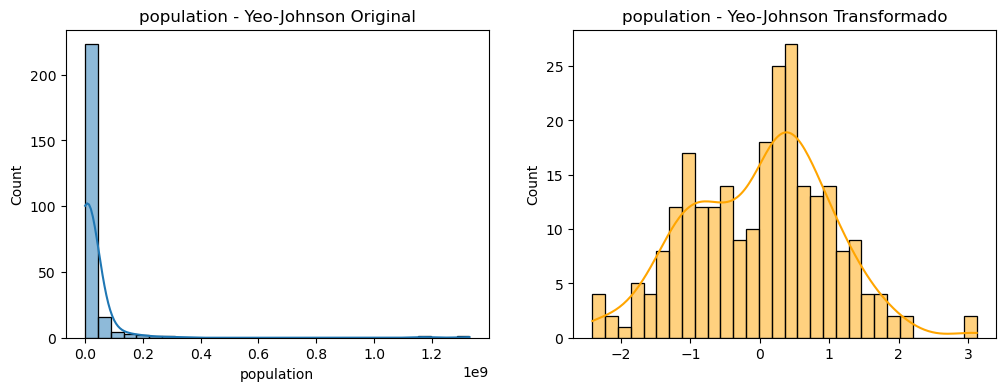

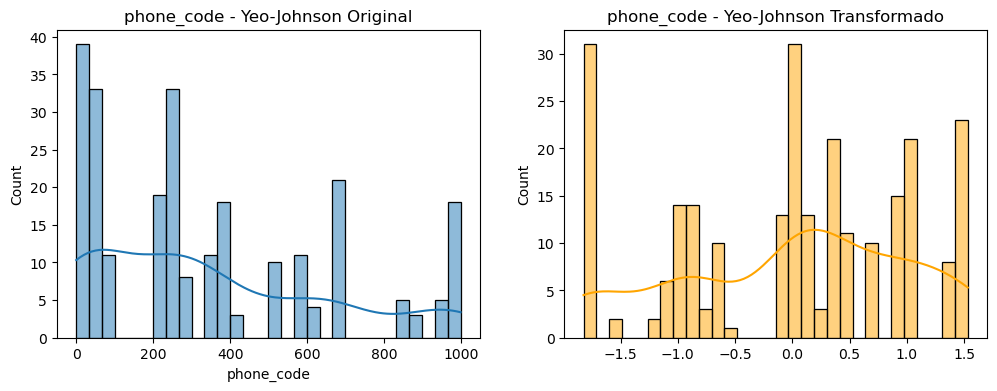

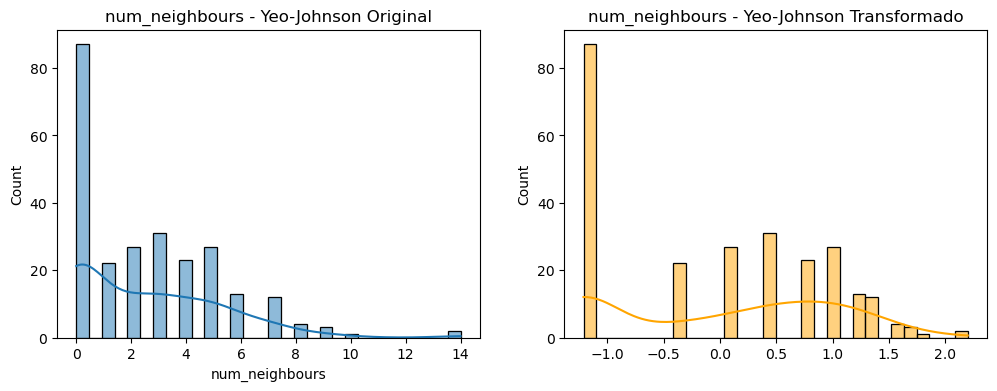

In [9]:
# 6. PowerTransformer Yeo-Johnson (valores negativos o cero permitidos)
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
X_yeojohnson = pt_yeojohnson.fit_transform(X)

for i, col in enumerate(features):
    plot_comparison(X[col], X_yeojohnson[:, i], f'{col} - Yeo-Johnson')